<a href="https://colab.research.google.com/github/Priyanshi11Gupta/PowerBi-projects/blob/main/classification_airline_passenger_referral_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import lightgbm

import warnings
warnings.filterwarnings("ignore")

#Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time
import secrets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB

#Importing metrics from evaluation for our models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

## Dataset Loading

In [6]:
#importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# load the dataset from drive
aviation_df = pd.read_excel('/content/drive/MyDrive/Datasets/data_airline_reviews.xlsx')

## Dataset First View

In [8]:
#Dataset First Look
#top_five_rows_of_data
aviation_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset Rows & Columns count

In [9]:
#Total number of rows and column of dataset
aviation_df.shape

(131895, 17)

In [10]:
#Columns names of the dataset
aviation_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

##Dataset Information

In [11]:
#Dataset Information
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [12]:
#Checking the unique values of the recommended column(target variable)
aviation_df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

In [14]:
#checking the unique values
aviation_df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

##Duplicate Values

In [16]:
#counting number of duplicated values
aviation_df.duplicated().sum()

70711

In [17]:
#dropping the null values
aviation_df.drop_duplicates(inplace = True)

In [18]:
aviation_df.duplicated().sum()

0

## Missing Values/Null Values

In [19]:
#Checking the null value count for each column
aviation_df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

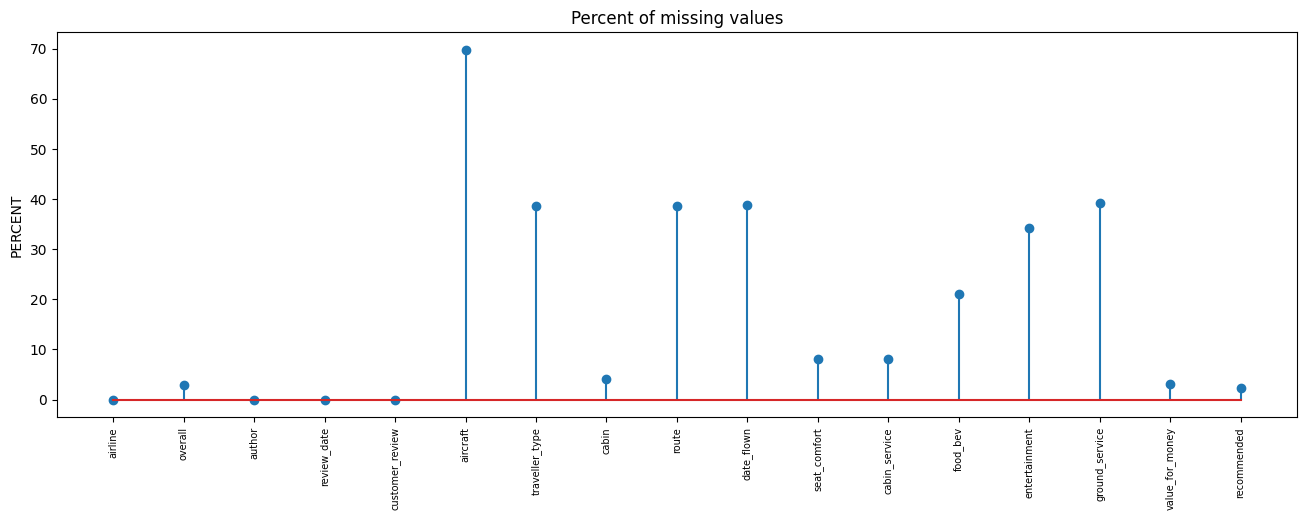

In [21]:
# Visualising the missing values
missing = pd.DataFrame((aviation_df.isnull().sum())*100/aviation_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = plt.stem(missing['index'], missing[0])
plt.xticks(rotation=90, fontsize = 7)
plt.title("Percent of missing values")
plt.ylabel("PERCENT")
plt.show()

##2. Understand Your Variables

In [22]:
#Dataset Describe
#Overall description of data
aviation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


##3. Exploratory Data Analysis and Visualisation
1. What are the average ratings given by passenger for food and beverage as well as entertainment in the Economy Class

In [23]:
#performing the groupby method
q1=aviation_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
q1

,cabin,food_bev,entertainment
0,Business Class,3.525108,3.356407
1,Economy Class,2.776919,2.758083
2,First Class,3.384295,3.280827
3,Premium Economy,2.919603,3.038980


<Axes: xlabel='cabin'>

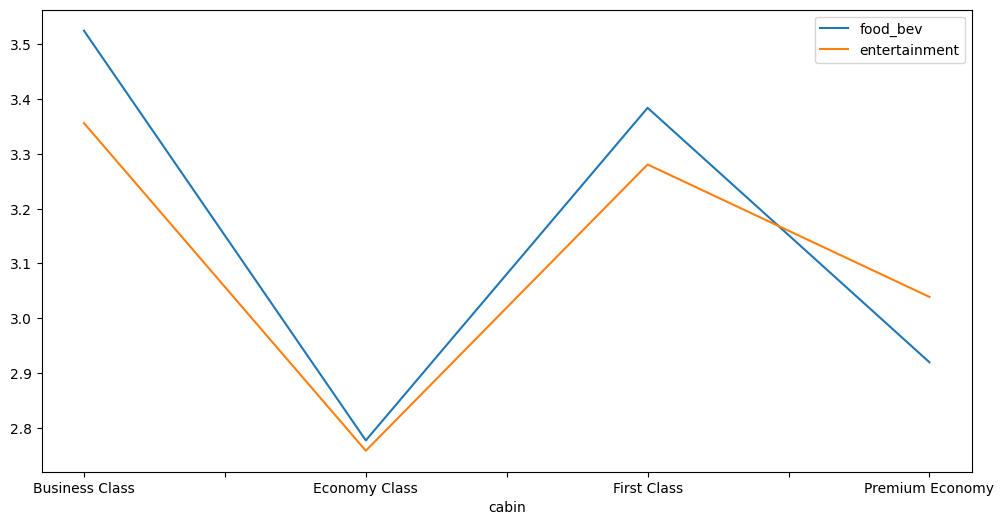

In [24]:
plt.rcParams['figure.figsize']=(12,6)
q1.plot(x="cabin", y=["food_bev","entertainment"], kind="line")

##2. Among the types of travels, which one has the highest overall service ratings?

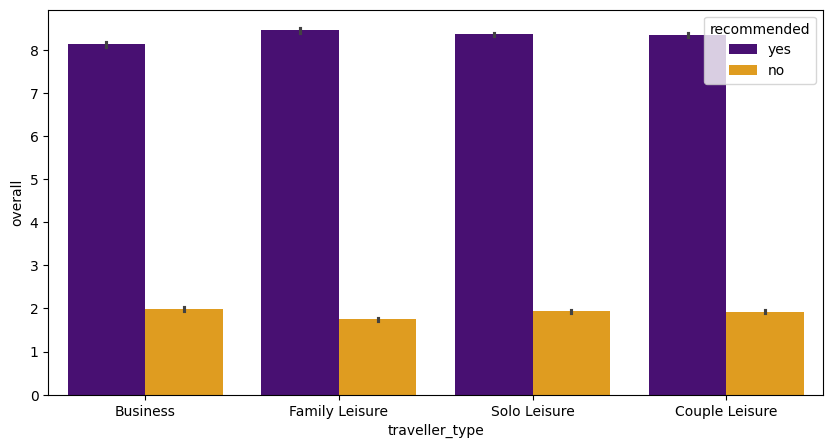

In [25]:
#Traveller type and overall service ratings(out of 10)

plt.figure(figsize=(10,5))
sns.barplot(x="traveller_type", y="overall", hue="recommended",data=aviation_df, palette=['indigo','orange'])
plt.show()

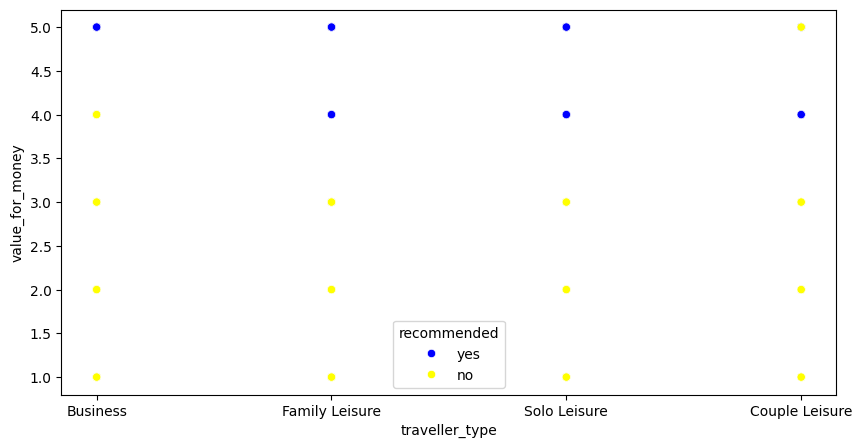

In [26]:
#Traveller type and value for money ratings (out of 5)

plt.figure(figsize=(10,5))
sns.scatterplot(x="traveller_type", y="value_for_money", hue="recommended", data=aviation_df, palette=['blue', 'yellow'])
plt.show()

##3. Among the different types of cabins, which one has the highest overall service rating?

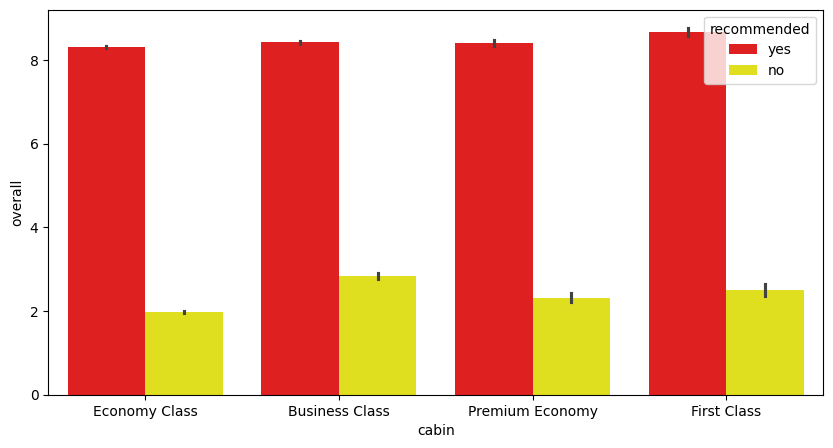

In [27]:
#Cabin type and overall service ratings (out of 10)

plt.figure(figsize=(10,5))
sns.barplot(x="cabin", y="overall", hue="recommended", data=aviation_df, palette=['red','yellow'])
plt.show()

##4. Which type of traveler has recieved more ratings?

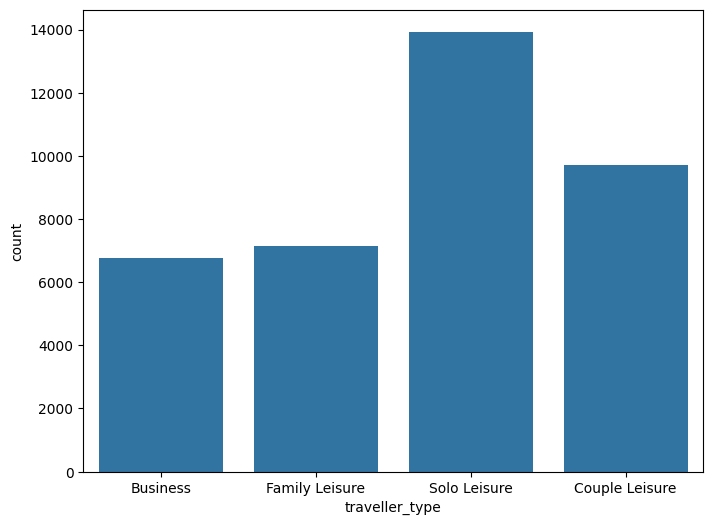

In [28]:
#setting the figure size and plotting the graph

plt.figure(figsize=(8,6))
sns.countplot(x="traveller_type", data=aviation_df)
plt.show()

##5. Which airline conducted the highest number of trips?

In [30]:
# Get the number of trips each airline make
trip_by_airlines = aviation_df['airline'].value_counts()
trip_by_airlines

Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64

## Getting more visualised view of 10 airlines trip through pie chart

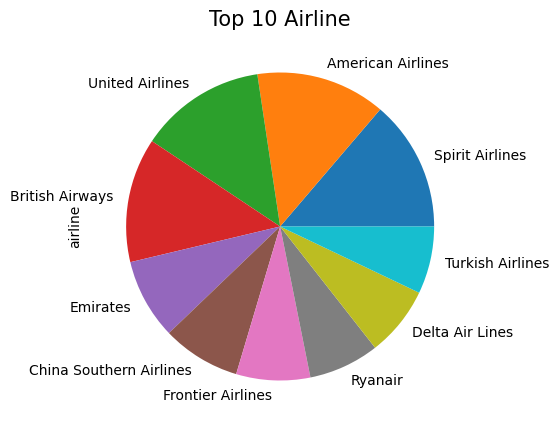

In [31]:
#visualisation of the top 10 airlines with most trips
plt.figure(figsize=(20,5))
trip_by_airlines[:10].plot(kind='pie')
plt.title('Top 10 Airline', fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

##6.Does solo Leisure provide good value for money?

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

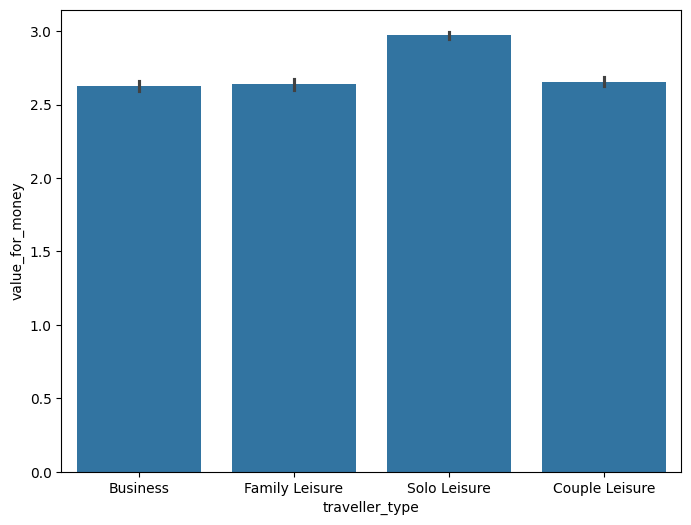

In [32]:
#plotting the graph
plt.figure(figsize=(8,6))
sns.barplot(x=aviation_df['traveller_type'], y=aviation_df['value_for_money'])

##7. Which Type of cabin receives more recommendations?

<Axes: xlabel='cabin', ylabel='count'>

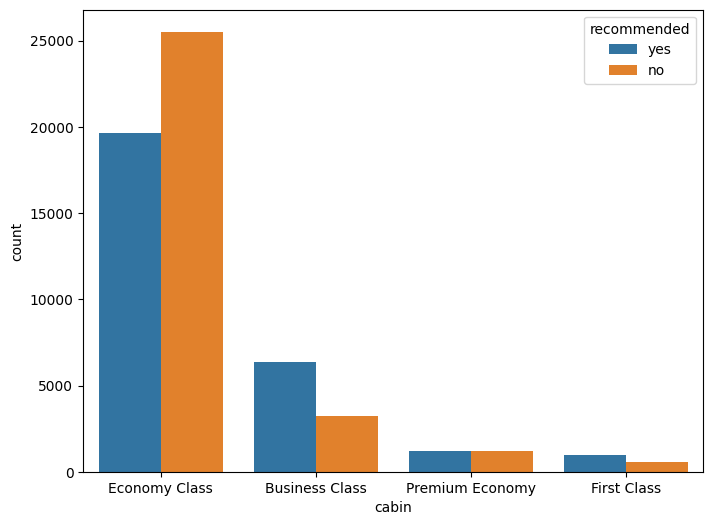

In [33]:
#plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(x="cabin", hue="recommended", data=aviation_df)

##8. Which type of cabin has received more service ratings?

<Axes: xlabel='cabin', ylabel='cabin_service'>

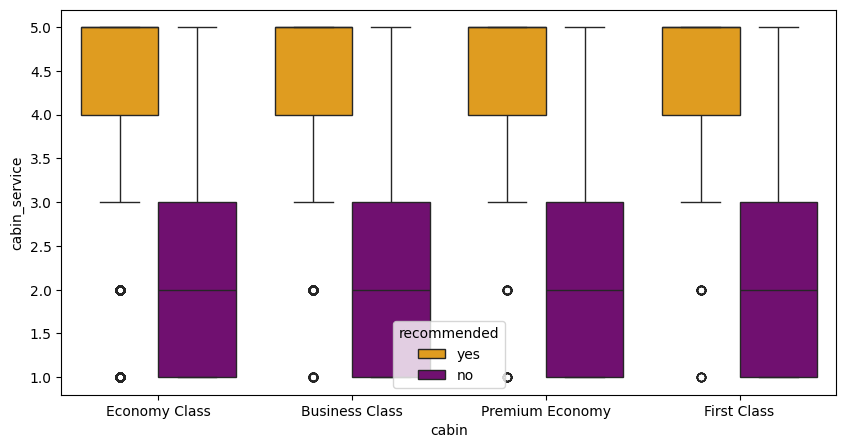

In [34]:
#Cabin type and Cabin service ratings
plt.figure(figsize=(10,5))
sns.boxplot(x="cabin", y="cabin_service", hue="recommended", data=aviation_df, palette=['orange','purple'])

##9. Which airline conducted the lowest number of trips?

(array([], dtype=float64), [])

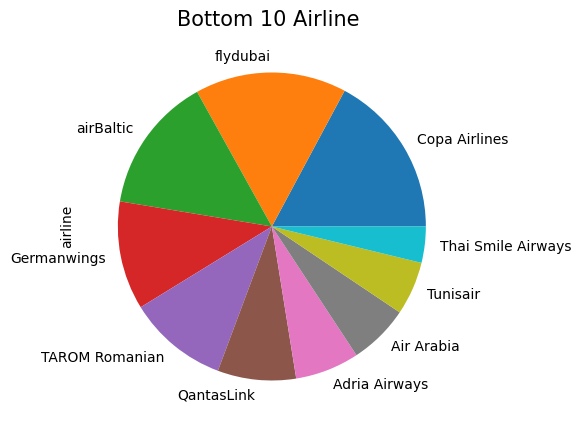

In [35]:
plt.figure(figsize=(20,5))
trip_by_airlines[-10:].plot(kind='pie')
plt.title('Bottom 10 Airline ',fontsize=15)
plt.xticks(rotation='horizontal')

##10. How do all of the independent variables/features compare with each other?

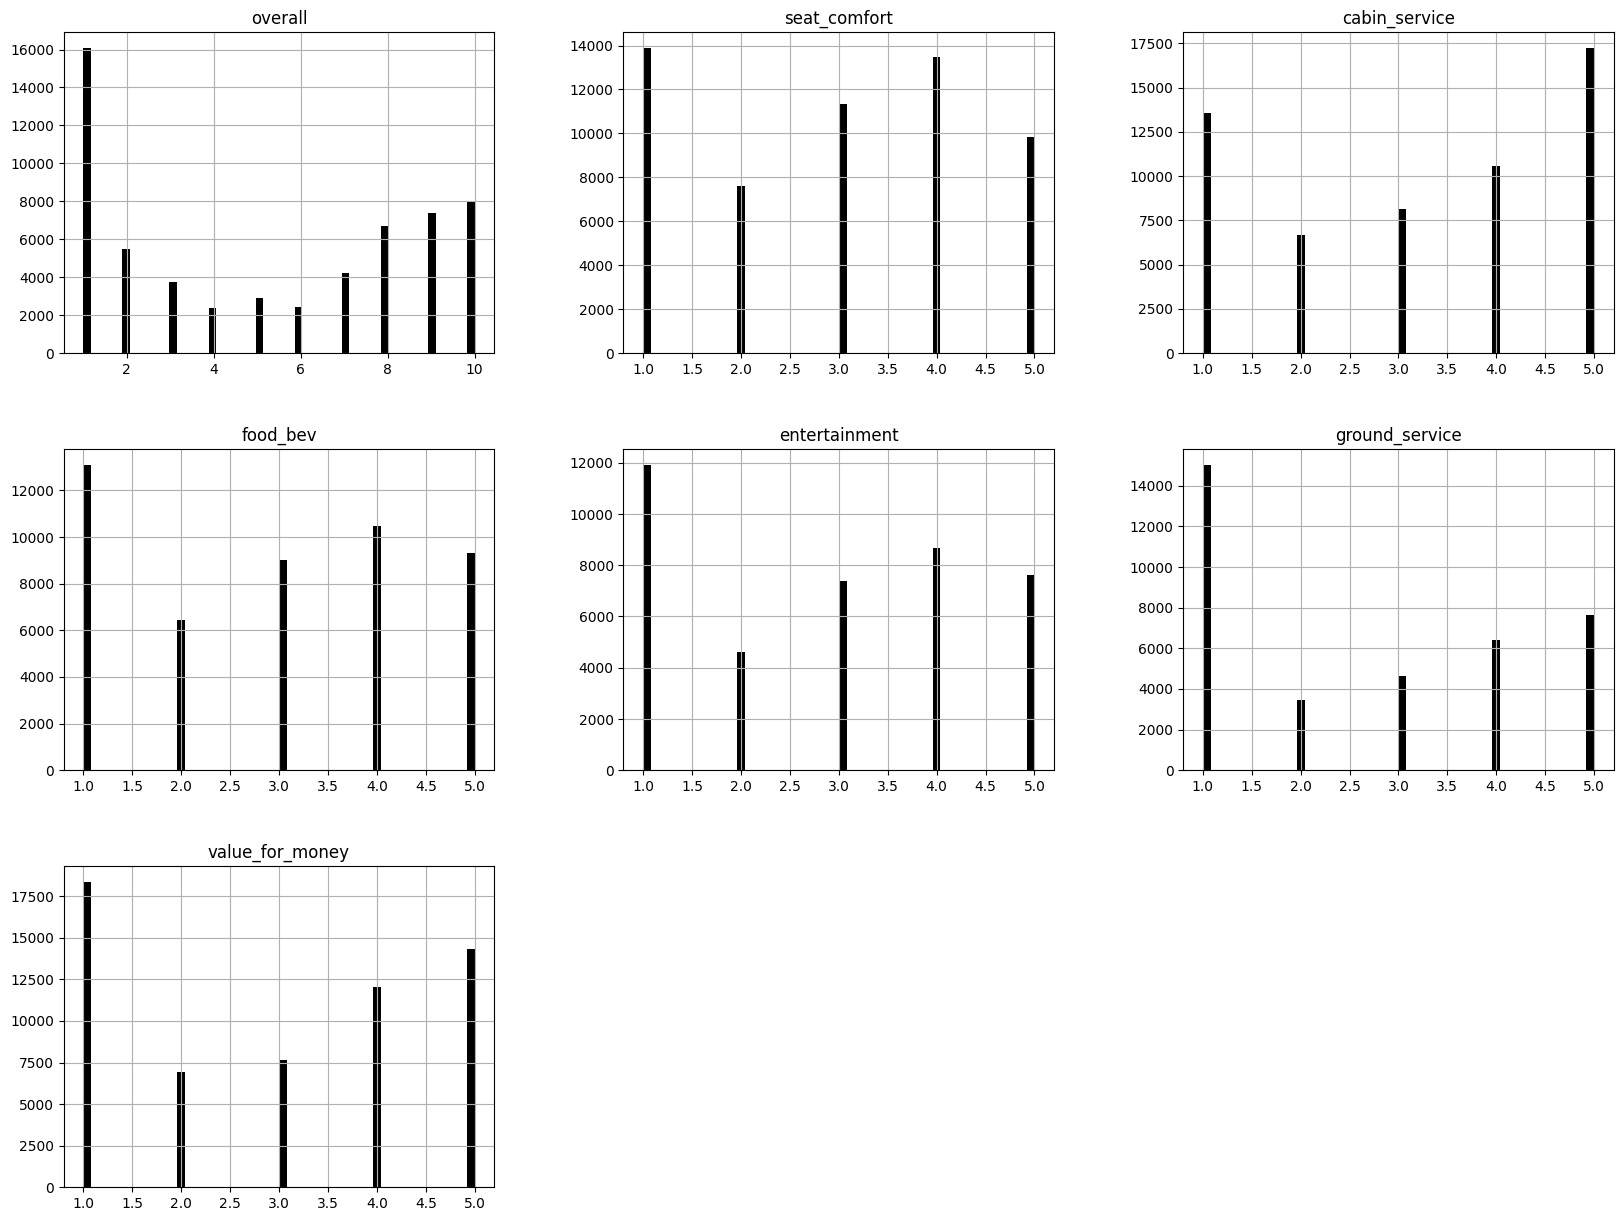

In [36]:
# frequency distribution using histogram
aviation_df.hist(bins=50, figsize=(20,15),color = 'black')
plt.show()

##Dropping Unnecessary Columns

In [39]:
#Checking Percentage wise missing values
def missing_values_per_check(df):
  percent_missing = aviation_df.isnull().sum() * 100 / len(aviation_df)
  missing_values_df = pd.DataFrame({'column_name':aviation_df.columns,
                                    'percent_missing':percent_missing})
  return missing_values_df.sort_values('percent_missing',ascending=False)

In [40]:
#Checking Percentage wise missing values
missing_values_per_check(aviation_df)

,column_name,percent_missing
aircraft,aircraft,69.782950
ground_service,ground_service,39.250458
date_flown,date_flown,38.817338
route,route,38.688219
traveller_type,traveller_type,38.644090
entertainment,entertainment,34.247516
food_bev,food_bev,20.990782
seat_comfort,seat_comfort,8.127942
cabin_service,cabin_service,8.080544
cabin,cabin,4.051713


In [41]:
#Showing the unique airline names
aviation_df.aircraft.unique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [43]:
#checking the no. of unique aircrafts
aviation_df.aircraft.nunique()

2088

##. Removing the aircraft column from the dataset as it contains a large number of missing values.

In [44]:
aviation_df = aviation_df.drop(['aircraft'],axis = 1)

In [45]:
#dropping the columns from data which are not usable for us
aviation_df = aviation_df.drop(['author','review_date','route','date_flown','customer_review'],axis = 1)
aviation_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes


In [46]:
#Splitting the Numeric column
low_null_values = ['overall','seat_comfort','cabin_service','value_for_money']
high_null_values = ['food_bev','entertainment','ground_service']

In [47]:
#Imputation technique using Quantile-1 value
def quantile1(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)

In [48]:
#Looping the null value column
for col in low_null_values:
  quantile1(aviation_df,col)

##. Imputed null values by Quantile-1 for the columns have low null value percentage

In [49]:
#Imputation technique using Median Imputation
def median_input(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [50]:
#Looping the null value column
for col in high_null_values:
  median_input(aviation_df,col)

##. Imputed null values by Median Imputation for the columns have high percentge

In [51]:
#after inputed null values
aviation_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,1.0,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,NaN


In [52]:
#Remove recommended null value row
aviation_df.dropna(subset=['recommended'],inplace=True)

In [53]:
aviation_df['traveller_type'].fillna(method="ffill",inplace=True)

In [54]:
aviation_df['cabin'].fillna(aviation_df['cabin'].mode().values[0],inplace=True)

##Filling traveller_type column with Mode Imputation cabin column with Forward fill method

In [55]:
aviation_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes


In [56]:
#Checking the new null value perentage
missing_values_per_check(aviation_df)

,column_name,percent_missing
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


In [57]:
aviation_df.shape

(59761, 11)

##Converting target as categorical data into numerical data: 'Label Encoding'

In [58]:
#converting targeted column
aviation_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [59]:
aviation_df.head(2)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0


<Axes: >

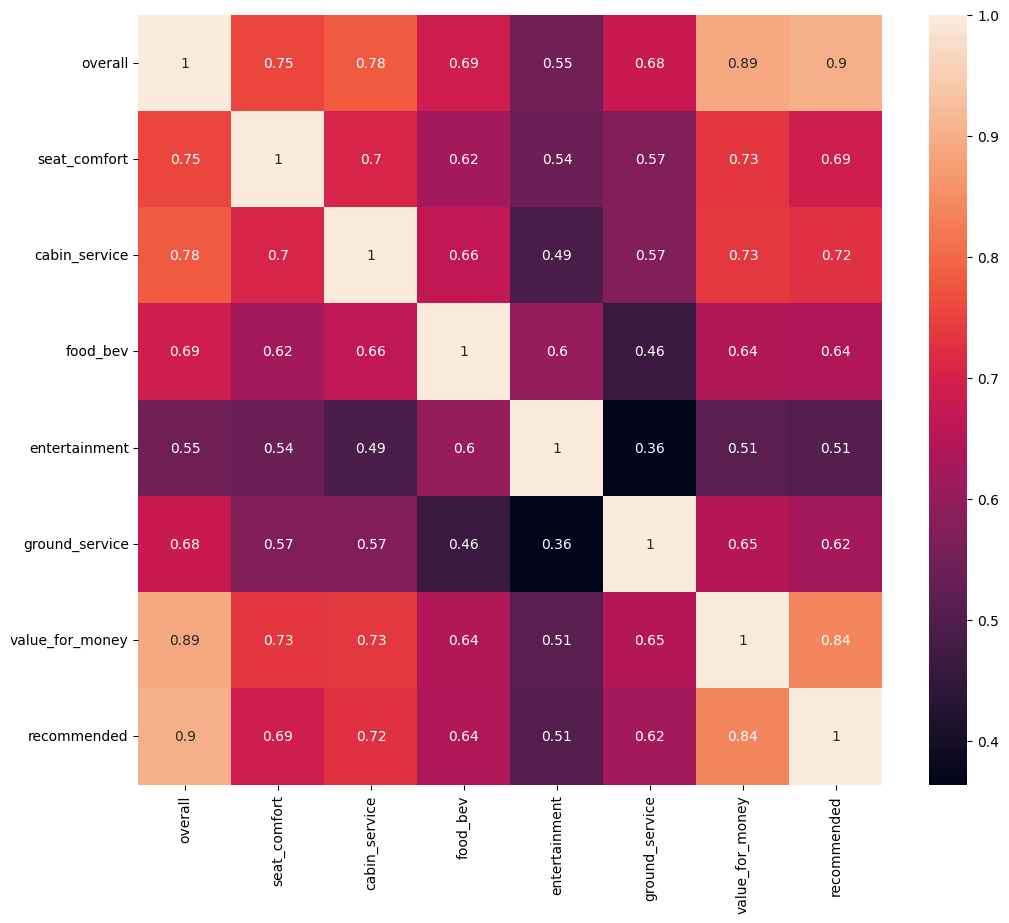

In [60]:
plt.figure(figsize=(12,10))
sns.heatmap(aviation_df.corr(), annot=True)

##4. Correlation Plot

##Removing multicolearnity feature

In [66]:
#Creating a function to remove multicollinearity
def calculate_vif(x):
  # Calulating VIF
  vif = pd.DataFrame()
  vif["variables"] = x.columns
  vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

  return(vif)

In [67]:
calculate_vif(aviation_df[[i for i in aviation_df.describe().columns if i not in ['recommended','value_for_money','overall']]])

,variables,VIF
0,seat_comfort,12.743652
1,cabin_service,12.939449
2,food_bev,13.023156
3,entertainment,9.669901
4,ground_service,8.380607


In [68]:
#drop overall column
aviation_df.drop(["overall"], axis = 1, inplace = True)

In [69]:
aviation_df.drop(["airline"], axis = 1, inplace = True)

##Defining the dependent and independent variables

In [70]:
#seprating the dependent and independent variables
y = aviation_df['recommended']
x = aviation_df.drop(columns = 'recommended')

In [71]:
x.columns

Index(['traveller_type', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money'],
      dtype='object')

##5. One hot encoding

In [72]:
x = pd.get_dummies(x)

In [73]:
x.shape

(59761, 14)

In [74]:
x.head(2)

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,0,0,1,0,0
3,4.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,1,0,0


In [75]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))

The Percentage of No labels of Target Variable is 52.0
The Percentage of Yes labels of Target Variable is 48.0


##6. Splitting Train and Test Data

In [76]:
#train and test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [77]:
#shape of x_train and x_test data
print(x_train.shape)
print(x_test.shape)

(47808, 14)
(11953, 14)


In [78]:
#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


##7. ML Model Implementation

## Model1 Fitting Logistic Regression

In [79]:
#logistic regression fitting
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [80]:
log_reg.coef_

array([[ 0.29470524,  0.54964494,  0.43522642,  0.24880929,  0.72092498,
         1.63381309,  0.15000711, -0.04985052, -0.15934752,  0.06655806,
         0.14922398, -0.06516326,  0.11367346, -0.19036704]])

In [81]:
log_reg.intercept_

array([-11.84300155])

In [82]:
log_reg.score(x_test,y_test)

0.9324019074709278

In [83]:
y_pred = log_reg.predict(x_test)

In [84]:
#report of logistic regression
report_lR = classification_report(y_test, y_pred)
print(report_lR)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



<Axes: >

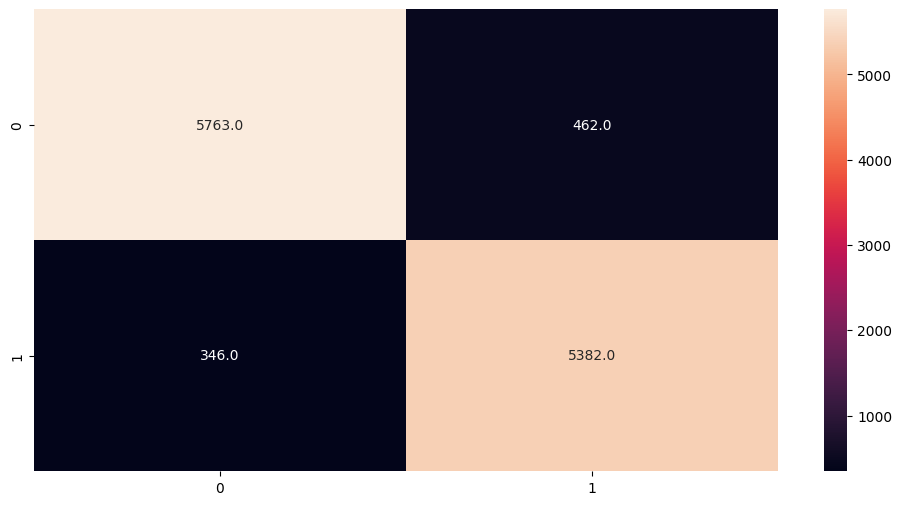

In [86]:
#confusion matrix of logistic regression
confuse_matrix_lR = confusion_matrix(y_test,y_pred)
#plotting confusion matrix
sns.heatmap(confuse_matrix_lR, annot=True, fmt = ".1f")

## Implementing Cross-validated Logistic Regression

In [87]:
logistic = LogisticRegression()

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
scores = cross_val_score(log_reg, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.9405982  0.94415394 0.93766994 0.94122569 0.93913407 0.93474169
 0.94080736 0.94143485 0.93284519 0.93702929]


In [90]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9328451882845188, 0.9389640216372515, 0.9441539426898139)

##Model 2 : Random Forest

In [91]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [92]:
random_forest.score(x_test,y_test)

0.9283025181962687

In [93]:
#report of Random Forest
report_ran_forest = classification_report(y_test, y_pred)
print(report_ran_forest)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



##Implementing Cross-validated Random Forest

In [94]:
parameters = {
    'n_estimators':[10,50,100],
    'max_depth':[2,5,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [95]:
random_forest_gridcv = GridSearchCV(estimator=random_forest,
                                    param_grid=parameters,
                                    cv = 5, verbose=2)

In [96]:
random_forest_gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=2, min_samples_leaf=1, min_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [97]:
random_forest_gridcv.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

##Model 3: Naive Bayes Classifier

In [98]:
#Implementing naive bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [99]:
#score for naive bayes
naive_bayes.score(x_train,y_train)

0.9177543507362784

In [100]:
# making predeictions on the testing set
y_pred = naive_bayes.predict(x_test)

In [101]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 91.0901029030369


##Model 4: Decision Tree Classifier

In [102]:
#Initialising Decision Tree Model Object
tree_classify=DecisionTreeClassifier()
#Training a model with x and y
tree_classify.fit(x_train,y_train)

DecisionTreeClassifier()

In [103]:
print("Training Accuracy of Decision Tree Model is",tree_classify.score(x_train,y_train))
print("Testing Accuracy of Decision Tree Model is",tree_classify.score(x_test,y_test))

Training Accuracy of Decision Tree Model is 0.9745440093708166
Testing Accuracy of Decision Tree Model is 0.9162553333891074


In [104]:
y_pred = tree_classify.predict(x_test)

In [105]:
#report of decision tree
report_dec_tree = classification_report(y_test, y_pred)
print(report_dec_tree)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



##Hyperparameter Tuning for Decision Tree

In [106]:
#setting the parameter and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

In [107]:
#performing hyperparameter tuning using gridsearchcv

#setting an estimator , and crossvalidation
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5, refit='accuracy')

#fitting x and y to gridsearchcv model using an estimator Decision tree classifier
tree_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [108]:
#calling an best params
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [109]:
#calling an best score
tree_cv.best_score_

0.9371443495580213

##Mode-5 Support Vector Machine

In [112]:
support_vector = SVC(kernel='linear')
support_vector.fit(x_train, y_train)

SVC(kernel='linear')

In [113]:
#score for support vector machine
support_vector.score(x_test, y_test)

0.9318162804316907

In [114]:
y_pred = support_vector.predict(x_test)

In [116]:
#confusion metrix
support_vector_conf_matrix = confusion_matrix(y_test,y_pred)
support_vector_conf_matrix

array([[5747,  478],
       [ 337, 5391]])

#Model-6: K-Nearest Neighbour

In [117]:
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train, y_train)

KNeighborsClassifier()

In [118]:
y_pred = k_neighbor.predict(x_test)

In [119]:
# Compute accuracy on the training set
train_accuracy = k_neighbor.score(x_train, y_train)
print(f"train_accuracy:",train_accuracy)
#Compute accuracy on the test set
test_accuracy = k_neighbor.score(x_test, y_test)
print(f"test_accuracy:", test_accuracy)

train_accuracy: 0.9493390227576974
test_accuracy: 0.9293901112691375


In [122]:
#confusion matrix for k_neighbor
confuse_matrix_k_neighbor = confusion_matrix(y_test,y_pred)
confuse_matrix_k_neighbor

array([[5815,  410],
       [ 434, 5294]])

In [123]:
# Area under ROC curve
roc_auc_score(y_test,y_pred)

0.9291841948800791

##Accuracy Metrics for All Fitted Model

In [128]:
#Creating a function to return all Models Accuracy Score

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train dates
  y_train_preds=model.predict(X_train)

  #predicting a test dates
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precision_Score','Recall_Score','Roc_Auc_Score']

  #Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)

  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  #Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  #Get the recall scores
  train_recall_score = recall_score(y_train,y_train_preds)
  test_recall_score = recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  #Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score=roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics

In [129]:
models=[log_reg,random_forest,naive_bayes,tree_cv,support_vector,k_neighbor]
name=['Logistic Regression Model','Random Forest Model After Hyperparameter Tuning','Naive Bayes Classifier','Decision Tree Model After Hyperparameter Tuning','Support Vector Machine','K-Nearest Neighbour']

In [131]:
for model_idx in range(len(models)):
  train_score, test_score, metrics = accuracy_of_each_model(models[model_idx], x_train, x_test)
  print("-" * 30)
  print(f"{name[model_idx]}")
  print("-" * 30)
  result_df = pd.DataFrame({'Metric': metrics,'Train Score':train_score,'Test Score':test_score})
  print(result_df.to_string(index=False))
  print("")

------------------------------
Logistic Regression Model
------------------------------
         Metric  Train Score  Test Score
 Accuracy_Score     0.938985    0.932402
Precision_Score     0.928165    0.920945
   Recall_Score     0.945003    0.939595
  Roc_Auc_Score     0.939259    0.932689

------------------------------
Random Forest Model After Hyperparameter Tuning
------------------------------
         Metric  Train Score  Test Score
 Accuracy_Score     0.974544    0.928303
Precision_Score     0.969988    0.924377
   Recall_Score     0.976763    0.926152
  Roc_Auc_Score     0.974645    0.928217

------------------------------
Naive Bayes Classifier
------------------------------
         Metric  Train Score  Test Score
 Accuracy_Score     0.917754    0.910901
Precision_Score     0.922928    0.914784
   Recall_Score     0.902658    0.897696
  Roc_Auc_Score     0.917068    0.910374

------------------------------
Decision Tree Model After Hyperparameter Tuning
--------------------